In [ ]:
%config Completer.use_jedi = True
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, GlobalMaxPooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Entrenar una red neuronal con Keras 
que sea reproducible, usando al menos 80
features, imputación de nulos, mean encoding, one hot encoding y un score en
validación superior a 0,7. Debe ser un modelo por separado a los propuestos, no
necesita búsqueda de hiper parámetros ni cumplir otra condición. ¿Cúal es su score
en validación y en la competencia?

In [ ]:
trainX = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/trainXParte3M1.csv')
trainY = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/trainYParte3M1.csv')
validationSetX = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/validationSetXParte3M1.csv')
validationSetY = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/validationSetYParte3M1.csv')

In [ ]:
scaler = StandardScaler()
scaledtrain = scaler.fit_transform(trainX)
scaledval = scaler.transform(validationSetX)

In [ ]:
tf.random.set_seed(8989)

In [ ]:
entrada = Input(shape=((281,)))

capa = Dense(45, activation="relu")(entrada)
capa = Dense(25, activation="relu")(capa)
capa = Dense(10, activation="relu")(capa)

salida = Dense(1, activation="sigmoid")(capa)

model = Model(inputs=entrada, outputs=salida)
#model.summary()
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(scaledtrain, trainY.values, batch_size=2048, epochs=5, validation_split=0.1 ) 

Epoch 1/5
238/238 [==============================] - 4s 8ms/step - loss: 0.1400 - accuracy: 0.9668 - val_loss: 0.1059 - val_accuracy: 0.9732
Epoch 2/5
238/238 [==============================] - 2s 6ms/step - loss: 0.1059 - accuracy: 0.9717 - val_loss: 0.1083 - val_accuracy: 0.9733
Epoch 3/5
238/238 [==============================] - 2s 7ms/step - loss: 0.1016 - accuracy: 0.9725 - val_loss: 0.1099 - val_accuracy: 0.9723
Epoch 4/5
238/238 [==============================] - 2s 7ms/step - loss: 0.0991 - accuracy: 0.9731 - val_loss: 0.1116 - val_accuracy: 0.9711
Epoch 5/5
238/238 [==============================] - 2s 7ms/step - loss: 0.0971 - accuracy: 0.9736 - val_loss: 0.1056 - val_accuracy: 0.9736


In [ ]:
preds = model.predict(scaledval)
roc_auc_score(validationSetY, preds)

0.8536177765054973

In [ ]:
test = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/testParte3M1.csv')

In [ ]:
test.set_index(pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/test_transaction.csv')['TransactionID'],inplace=True)

In [ ]:
pd.DataFrame(model.predict(scaler.transform(test)), index=test.index ).rename(columns={0:'isFraud'}).to_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/late_submissionExtra.csv')

Score de validacion = 0.85

Score de la competencia = 0.49

(Seguramente hay un error en algun lado con test pero no lo pude encontrar)

### Graficar la importancia de features para algún modelo de la parte III. 
¿Qué tanto se
parece a los features importantes de la parte II?

In [ ]:
import pickle
with open('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/model_backupM2', 'rb') as file:
    clf = pickle.load(file)

In [ ]:
trainX = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/trainXParte3M1.csv')

In [ ]:
coefsdata = pd.DataFrame.from_dict({x:y for x,y in zip(trainX.columns, clf.best_estimator_.feature_importances_)}, orient='index').rename(columns={0:'proba'})

In [ ]:
clf.best_estimator_.feature_importances_
coefsdata = pd.DataFrame.from_dict({x:y for x,y in zip(trainX.columns, coefs)}, orient='index').rename(columns={0:'proba'})

array([5.05582888e-02, 4.31965844e-02, 3.85678284e-02, 3.21655829e-02,
       3.24388489e-02, 2.73019658e-02, 2.10758061e-02, 2.96877521e-02,
       1.55263095e-02, 1.84216267e-02, 2.03974845e-02, 1.22810298e-02,
       1.95011570e-02, 1.92731147e-02, 1.88910492e-02, 9.56192721e-03,
       1.47271688e-02, 1.66631220e-02, 9.65805995e-03, 1.53818551e-02,
       1.31020525e-02, 1.55182359e-02, 1.91269585e-02, 1.46343508e-02,
       1.53081062e-02, 1.42982808e-02, 1.74841670e-02, 9.42731475e-03,
       1.48709509e-02, 1.02333139e-02, 8.27124838e-03, 9.89465540e-03,
       1.52185479e-02, 1.02897899e-02, 1.50081826e-02, 1.43892922e-02,
       1.34409572e-02, 1.20475565e-02, 7.60171825e-03, 9.74892244e-03,
       1.04243855e-02, 8.96650698e-03, 1.13782582e-02, 1.02519859e-02,
       1.11965635e-02, 1.04041531e-02, 4.55123010e-03, 4.34209119e-03,
       2.93232885e-03, 1.92838387e-03, 1.45870882e-03, 1.30920510e-03,
       2.51496304e-03, 2.40929605e-03, 3.08462120e-03, 3.26932578e-03,
      

In [ ]:
top20 = coefsdata.nlargest(20, columns='proba')

Text(0.5, 1.0, 'Importancia de los Features')

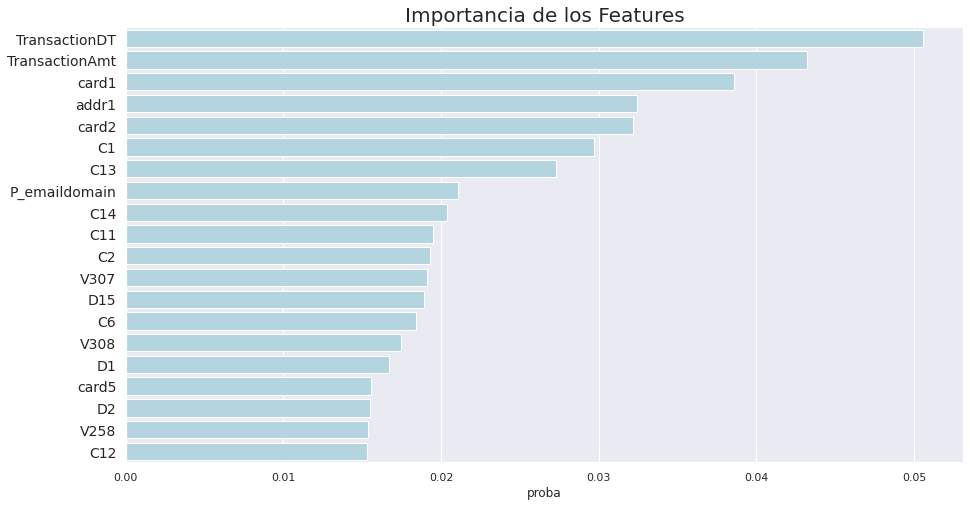

In [ ]:
import seaborn as sns
sns.set(style="darkgrid",rc={'figure.figsize':(15,8)})
barnorm = sns.barplot(x=top20['proba'], y=top20.index, color='lightblue')
barnorm.set_yticklabels(top20.index, fontsize=14, rotation=0, ha= 'right')
barnorm.set_title('Importancia de los Features', fontsize=20)

ACLARACION

Aca me di cuenta que el modelo eligió a TransactionDT como muy importante pero eso no tiene sentido ya que es una feature que sin un preprocessing no es buena.
Sospecho que al dejar la feature asi como venia el modelo se confundió.
Las importancias solo se parecen en que V258 esta maso en la misma posicion, el resto es todo diferente

### Graficar la matriz de confusión para algún modelo de la parte III 

In [ ]:
# uso el modelo cargado en el punto anterior

In [ ]:
validationSetX = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/validationSetXParte3M1.csv')

In [ ]:
validationSetY = pd.read_csv('/content/drive/Othercomputers/Gabriel-G5/FIUBA/ORGADATOS/TP3/data/Parte3/validationSetYParte3M1.csv')

In [ ]:
preds = clf.predict(validationSetX.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [ ]:
matrix = confusion_matrix(validationSetY)
matrix

array([[48534,    97],
       [ 1273,   632]])

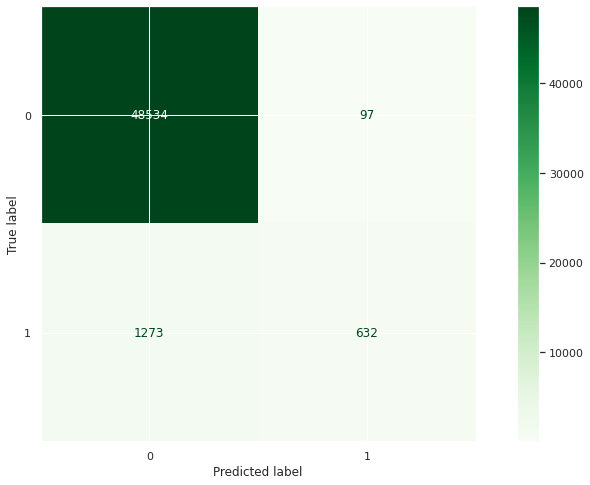

In [ ]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot(cmap='Greens')